In [1]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '65693ab1-d4e3-401b-871f-944dbdbaf52a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-08T19:15:42.820Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10051}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11630, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973730e+07,1.973730e+07,False,NaN,1,NaN,NaN,None,2024-08-08T19:15:00.000Z,59687.353946,4.150333e+10,0.1962,0.376198,8.470649,-5.532718,3.192920,-14.482325,-1.697273,1.178067e+12,56.3135,1.253434e+12,None,2024-08-08T19:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 15:15:52.703916
1,1027,Ethereum,ETH,ethereum,9200,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202612e+08,1.202612e+08,True,NaN,2,NaN,NaN,None,2024-08-08T19:14:00.000Z,2584.781972,2.235148e+10,-6.8483,-0.211889,9.765998,-16.745037,-15.551893,-30.274559,-11.054626,3.108491e+11,14.8591,3.108491e+11,None,2024-08-08T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 15:15:52.703916
2,825,Tether USDt,USDT,tether,93812,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.150179e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-08T19:13:00.000Z,1.000343,7.002776e+10,-0.6401,-0.001524,0.021574,0.145912,0.045072,0.048134,0.027255,1.150573e+11,5.5094,1.171082e+11,None,2024-08-08T19:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 15:15:52.703916
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459367e+08,1.459367e+08,False,NaN,4,NaN,NaN,None,2024-08-08T19:14:00.000Z,505.557291,1.731280e+09,-7.8519,0.051687,7.117020,-9.303848,-2.418107,-25.478588,-13.797583,7.377938e+10,3.5268,7.377938e+10,None,2024-08-08T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 15:15:52.703916
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.663419e+08,5.817990e+08,True,NaN,5,NaN,NaN,None,2024-08-08T19:13:00.000Z,157.187548,5.155777e+09,-6.7206,-0.005961,8.856458,-2.270634,10.465039,-3.511662,6.178687,7.330314e+10,3.5018,9.145156e+10,None,2024-08-08T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 15:15:52.703916
5,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,6,NaN,NaN,None,2024-08-08T19:15:00.000Z,0.640656,6.020903e+09,326.4331,2.324122,27.509869,10.782496,47.455758,28.750381,26.871399,3.587629e+10,1.7133,6.406561e+10,None,2024-08-08T19:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 15:15:52.703916
6,3408,USDC,USDC,usd-coin,21427,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.449141e+10,3.449141e+10,False,NaN,7,NaN,NaN,None,2024-08-08T19:13:00.000Z,0.999897,8.416441e+09,-5.3210,-0.004983,-0.005982,-0.006638,-0.003477,-0.003577,-0.061651,3.448785e+10,1.6514,3.448785e+10,None,2024-08-08T19:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-08 15:15:52.703916
7,11419,Toncoin,TON,toncoin,498,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518316e+09,5.110190e+09,True,NaN,8,3.414167e+09,2.117302e+10,None,2024-08-08T19:14:00.000Z,6.201518,1.064672e+09,229.9250,0.373311,14.920598,-7.062295,-14.911595,-13.371713,-7.578823,1.561738e+10,0.7461,3.169094e+10,None,2024-08-08T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 15:15:52.703916
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchan

In [4]:
def api_runner():
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '65693ab1-d4e3-401b-871f-944dbdbaf52a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\beaka\OneDrive\Desktop\pandas\API.csv'):
        df.to_csv(r'C:\Users\beaka\OneDrive\Desktop\pandas\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\beaka\OneDrive\Desktop\pandas\API.csv',mode='a',header=False)
        

In [ ]:
import os 
from time import time
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(3600)

API Runner completed
API Runner completed


In [125]:
df1 = pd.read_csv(r'C:\Users\beaka\OneDrive\Desktop\pandas\API.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11628,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19736950.00000,19736950.00000,False,NaN,1,NaN,NaN,NaN,2024-08-07T22:15:00.000Z,55092.43543,42197500500.14854,-14.52660,0.18186,-2.93253,-15.06447,-2.90349,-20.59301,-12.03472,1087356643455.32263,55.77610,1156941144024.87988,NaN,2024-08-07T22:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-07 18:16:10.920487
1,1,1027,Ethereum,ETH,ethereum,9194,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120259132.65812,120259132.65812,True,NaN,2,NaN,NaN,NaN,2024-08-07T22:14:00.000Z,2345.65829,24570940096.20077,-5.68890,0.09455,-6.37143,-27.36723,-22.56353,-36.24133,-22.41501,282086831829.85333,14.46970,282086831829.84998,NaN,2024-08-07T22:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-07 18:16:10.920487
2,2,825,Tether USDt,USDT,tether,93719,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,114551170628.49146,117068083201.87019,True,NaN,3,NaN,NaN,NaN,2024-08-07T22:14:00.000Z,1.00053,73035658801.26962,-10.68140,0.02584,0.00744,0.05773,0.05320,0.05397,0.07363,114611618364.10815,5.86690,117129859092.10001,NaN,2024-08-07T22:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-07 18:16:10.920487
3,3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145936794.46008,145936794.46008,False,NaN,4,NaN,NaN,NaN,2024-08-07T22:14:00.000Z,474.49068,1901681998.27616,-10.26430,-0.02329,-3.43893,-18.01252,-7.14037,-30.83172,-20.52281,69245649539.44624,3.55200,69245649539.45000,NaN,2024-08-07T22:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-07 18:16:10.920487
4,4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466349620.20598,581803983.02303,True,NaN,5,NaN,NaN,NaN,2024-08-07T22:14:00.000Z,145.05853,5617082287.46691,-3.61940,-0.03366,-2.74460,-16.03286,3.41577,-8.62671,-4.28605,67647992302.92185,3.47590,84395632933.00999,NaN,2024-08-07T22:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-07 18:16:10.920487
5,5,52,XRP,XRP,xrp,1362,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,6,NaN,NaN,NaN,2024-08-07T22:15:00.000Z,0.63156,3868456302.38881,118.19220,3.36655,22.91772,-0.06652,46.49351,27.76075,21.74828,35366821377.84329,1.81790,63155845723.71000,NaN,2024-08-07T22:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-07 18:16:10.920487
6,6,3408,USDC,USDC,usd-coin,21401,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34513335240.20937,34513335240.20937,False,NaN,7,NaN,NaN,NaN,2024-08-07T22:14:00.000Z,1.00023,9270679448.53192,-7.40800,0.02309,0.01918,0.01053,0.01939,0.01222,0.01371,34521241412.30766,1.76710,34521241412.31000,NaN,2024-08-07T22:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-07 18:16:10.920487
7,7,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,145440786383.70523,145440786383.70523,True,NaN,8,NaN,NaN,NaN,2024-08-07T22:15:00.000Z,0.09600,1002799869.49854,-12.74240,-0.57712,-2.28869,-21.48417,-11.33032,-34.33484,-36.25837,13962280065.33078,0.71620,13962280065.33000,NaN,202

In [42]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [127]:
df2 = df1.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',
'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.18186,-2.93253,-15.06447,-2.90349,-20.59301,-12.03472
Ethereum,0.09055,-6.38171,-27.38132,-22.56732,-36.24641,-22.43780
Tether USDt,0.03791,0.02430,0.08100,0.06002,0.07025,0.08171
BNB,-0.03213,-3.45299,-18.01253,-7.12632,-30.83407,-20.51930
Solana,-0.05900,-2.78213,-16.05320,3.38759,-8.65339,-4.31504
XRP,3.16355,22.89947,-0.04707,46.46967,27.72893,21.69927
USDC,0.03456,0.03829,0.02688,0.02640,0.02601,0.02497
Dogecoin,-0.55542,-2.33112,-21.52356,-11.35974,-34.35055,-36.34327
Toncoin,0.31101,-6.47452,-19.87043,-23.69170,-22.60035,-15.11708


In [129]:
df3 = df2.stack()
type(df3)
df3

name                                      
Bitcoin       quote.USD.percent_change_1h      0.18186
              quote.USD.percent_change_24h    -2.93253
              quote.USD.percent_change_7d    -15.06447
              quote.USD.percent_change_30d    -2.90349
              quote.USD.percent_change_60d   -20.59301
              quote.USD.percent_change_90d   -12.03472
Ethereum      quote.USD.percent_change_1h      0.09055
              quote.USD.percent_change_24h    -6.38171
              quote.USD.percent_change_7d    -27.38132
              quote.USD.percent_change_30d   -22.56732
              quote.USD.percent_change_60d   -36.24641
              quote.USD.percent_change_90d   -22.43780
Tether USDt   quote.USD.percent_change_1h      0.03791
              quote.USD.percent_change_24h     0.02430
              quote.USD.percent_change_7d      0.08100
              quote.USD.percent_change_30d     0.06002
              quote.USD.percent_change_60d     0.07025
              quote.US

In [130]:
df4 = df3.to_frame()
df4 = df3.reset_index()
df4.columns = ['Name','Percent Change Interval','Values']
df4

,Name,Percent Change Interval,Values
0,Bitcoin,quote.USD.percent_change_1h,0.18186
1,Bitcoin,quote.USD.percent_change_24h,-2.93253
2,Bitcoin,quote.USD.percent_change_7d,-15.06447
3,Bitcoin,quote.USD.percent_change_30d,-2.90349
4,Bitcoin,quote.USD.percent_change_60d,-20.59301
5,Bitcoin,quote.USD.percent_change_90d,-12.03472
6,Ethereum,quote.USD.percent_change_1h,0.09055
7,Ethereum,quote.USD.percent_change_24h,-6.38171
8,Ethereum,quote.USD.percent_change_7d,-27.38132
9,Ethereum,quote.USD.percent_change_30d,-22.56732


In [131]:
df4['Percent Change Interval']=df4['Percent Change Interval'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']
                                                                      ,['1h','24h','7d','30d','60d','90d'])
df4


,Name,Percent Change Interval,Values
0,Bitcoin,1h,0.18186
1,Bitcoin,24h,-2.93253
2,Bitcoin,7d,-15.06447
3,Bitcoin,30d,-2.90349
4,Bitcoin,60d,-20.59301
5,Bitcoin,90d,-12.03472
6,Ethereum,1h,0.09055
7,Ethereum,24h,-6.38171
8,Ethereum,7d,-27.38132
9,Ethereum,30d,-22.56732


In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

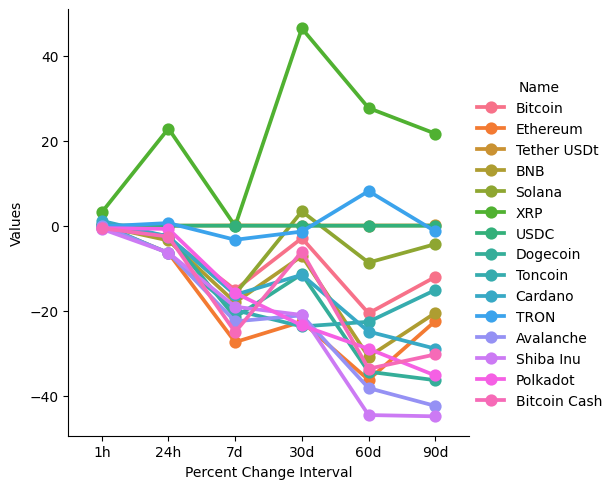

In [133]:
sns.catplot(data=df4 , x='Percent Change Interval',y='Values',hue='Name',kind='point')

In [136]:
df5 = df1[['name','quote.USD.price','timestamp']]
df6 = df5.query("name== 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,55092.43543,2024-08-07 18:16:10.920487
15,Bitcoin,55092.43543,2024-08-07 18:17:11.315733


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

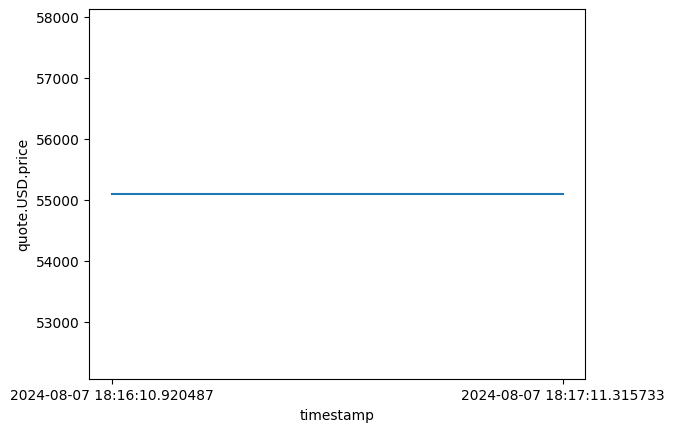

In [138]:
sns.lineplot(x='timestamp',y='quote.USD.price',data = df6)